In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import helper_functions as hf

pd.options.display.float_format = '{:.2f}'.format

# Feature Selection

## Vote Getter Models

In [28]:
## Load in the data for pitchers and batter
relievers = pd.read_csv('../data/cleaned/rookie_relief.csv')

relievers.drop_duplicates(subset=['Season', 'MLBAMID'], inplace=True)

## Load in the data for pitchers and batter
starters = pd.read_csv('../data/cleaned/rookie_starter.csv')

starters.drop_duplicates(subset=['Season', 'MLBAMID'], inplace=True)

batters = pd.read_csv('../data/cleaned/rookie_batters.csv')

batters.drop_duplicates(subset=['Season', 'MLBAMID'], inplace=True)

In [29]:
predictors = ['ERA-', 'FIP-', 'K/BB+', 'HR/9+',
              'AVG+', 'WHIP+', 'K%+', 'BB%+', 'K-BB%', 
              'WPA/LI', 'WPA/IP', 'WAR/IP', 
              'WPA', 'WAR', 'IP', 'SD', 'MD', 'SD_pct']

hf.get_mutual_info(data=relievers, target='vote_getter', predictors=predictors)
print("\n")
hf.get_corr_info(data=relievers, target='vote_getter', predictors=predictors)

### Eliminate: 'BB%+', 'MD', 'HR/9+'

ERA-: 0.07814820501163
FIP-: 0.0470509902484737
K/BB+: 0.026968875048282825
HR/9+: 0.030315166298976015
AVG+: 0.026339190952140656
WHIP+: 0.04925172729681626
K%+: 0.05828497090960294
BB%+: 0.0
K-BB%: 0.026847786377454996
WPA/LI: 0.09536204954420402
WPA/IP: 0.08598115083646296
WAR/IP: 0.09644988898484241
WPA: 0.08136979655374033
WAR: 0.1078009412101597
IP: 0.048108740745205214
SD: 0.10199218284843048
MD: 0.0
SD_pct: 0.07121565342803993


Correlation with `vote_getter`:
WAR       0.49
SD        0.48
WPA       0.45
IP        0.43
WPA/LI    0.42
WAR/IP    0.38
WPA/IP    0.36
K%+       0.36
SD_pct    0.31
K/BB+     0.28
K-BB%     0.21
MD        0.16
BB%+     -0.08
HR/9+    -0.18
AVG+     -0.30
WHIP+    -0.31
FIP-     -0.32
ERA-     -0.34
dtype: float64


In [30]:
predictors = ['ERA-', 'FIP-', 'K/BB+', 'HR/9+',
            'AVG+', 'WHIP+', 'K%+', 'BB%+', 'K-BB%', 
            'WPA/LI', 'WPA/IP', 'WAR/IP', 
            'WPA', 'WAR', 'IP']

hf.get_mutual_info(data=starters, target='vote_getter', predictors=predictors)
print("\n")
hf.get_corr_info(data=starters, target='vote_getter', predictors=predictors)

### Eliminate: BB%+, HR/9+

ERA-: 0.11683847838421624
FIP-: 0.08238054495300928
K/BB+: 0.05320242862722102
HR/9+: 0.023253584407862737
AVG+: 0.09474905318439308
WHIP+: 0.10036354547747828
K%+: 0.039175800036834074
BB%+: 0.040172417700708785
K-BB%: 0.046374877617562316
WPA/LI: 0.12161433427466628
WPA/IP: 0.14966344591293756
WAR/IP: 0.09323459005219226
WPA: 0.15595316463756626
WAR: 0.13789497337208356
IP: 0.08423018777280022


Correlation with `vote_getter`:
WPA       0.52
WAR       0.50
WPA/IP    0.49
WPA/LI    0.49
IP        0.42
WAR/IP    0.38
K/BB+     0.30
K%+       0.29
K-BB%     0.21
BB%+     -0.10
HR/9+    -0.23
FIP-     -0.38
AVG+     -0.38
WHIP+    -0.41
ERA-     -0.48
dtype: float64


In [31]:
predictors = ['BB/K', 'wOBA', 'wRC+', 
            'BB%+', 'K%+', 'OBP+', 'SLG+',
            'ISO+', 'WPA/G', 'WPA/LI', 'WAR/G', 
            'Def', 'Off', 'WAR', 'WPA', 'PA']

hf.get_mutual_info(data=batters, target='vote_getter', predictors=predictors)
print("\n")
hf.get_corr_info(data=batters, target='vote_getter', predictors=predictors)

### Eliminate: BB%+, K%+, Def

BB/K: 0.05626076431130245
wOBA: 0.12612826775849095
wRC+: 0.13411568358043047
BB%+: 0.0
K%+: 0.02631149726662274
OBP+: 0.09670550000800238
SLG+: 0.08644492527211178
ISO+: 0.05597921668001038
WPA/G: 0.1048748292445818
WPA/LI: 0.1520504106000169
WAR/G: 0.13440420645688422
Def: 0.030287768867343967
Off: 0.13346965214883744
WAR: 0.18931090920110738
WPA: 0.10921018556029183
PA: 0.14562054480693454


Correlation with `vote_getter`:
WAR       0.52
PA        0.51
wOBA      0.49
WAR/G     0.49
wRC+      0.47
WPA/LI    0.47
Off       0.46
WPA/G     0.44
WPA       0.44
SLG+      0.43
OBP+      0.41
ISO+      0.28
BB/K      0.22
BB%+      0.10
Def       0.03
K%+      -0.11
dtype: float64


## Rookie of the Year Models

In [32]:
predictors = ['IP', 'ERA-', 'FIP-', 'K/BB+', 'HR/9+', 'vote_getter',
            'AVG+', 'WHIP+', 'K%+', 'BB%+', 'K-BB%', 
            'WPA', 'SD', 'MD', 'SD_pct', 'WPA/LI', 'WPA/IP',
            'WAR', 'WAR/IP']

hf.get_mutual_info(data=relievers, target='rookie_of_the_year', predictors=predictors)
print("\n")
hf.get_corr_info(data=relievers, target='rookie_of_the_year', predictors=predictors)

### Eliminate: HR/9+, MD, BB%+, K-BB%

IP: 0.011820321081427387
ERA-: 0.009932758400365671
FIP-: 0.007962065841035981
K/BB+: 0.0023700029919967447
HR/9+: 0.0
vote_getter: 0.026517378094873867
AVG+: 0.014812183182189909
WHIP+: 0.004900654508577795
K%+: 0.009709897352083718
BB%+: 0.0
K-BB%: 0.0008165421578926191
WPA: 0.010912381666095539
SD: 0.023466005259450973
MD: 0.0027233427565956925
SD_pct: 0.02081535673782109
WPA/LI: 0.016106791493531558
WPA/IP: 0.007139732039954549
WAR: 0.02202913283301522
WAR/IP: 0.011765444896741362


Correlation with `vote_getter`:
vote_getter    0.32
SD             0.24
WAR            0.20
WPA            0.18
WPA/LI         0.18
K%+            0.15
WAR/IP         0.15
IP             0.15
WPA/IP         0.15
SD_pct         0.13
K-BB%          0.09
K/BB+          0.08
MD             0.07
BB%+          -0.01
HR/9+         -0.07
FIP-          -0.12
WHIP+         -0.13
ERA-          -0.13
AVG+          -0.15
dtype: float64


In [33]:
predictors = ['IP', 'ERA-', 'FIP-', 'K/BB+', 'HR/9+', 'vote_getter',
            'AVG+', 'WHIP+', 'K%+', 'BB%+', 'K-BB%', 
            'WPA', 'WPA/LI', 'WPA/IP',
            'WAR', 'WAR/IP']

hf.get_mutual_info(data=starters, target='rookie_of_the_year', predictors=predictors)
print("\n")
hf.get_corr_info(data=starters, target='rookie_of_the_year', predictors=predictors)

### Eliminate: BB%+

IP: 0.015024523425118064
ERA-: 0.030981654701822903
FIP-: 0.027230628437102222
K/BB+: 0.008581223813993288
HR/9+: 0.0036046653318029254
vote_getter: 0.043373316156902764
AVG+: 0.030739564080673576
WHIP+: 0.020055807863682107
K%+: 0.03077815382083826
BB%+: 0.010790560693272333
K-BB%: 0.007778275758661302
WPA: 0.06345994968179491
WPA/LI: 0.05786584208732792
WPA/IP: 0.05113372408078498
WAR: 0.044423758812575986
WAR/IP: 0.03404032704948601


Correlation with `vote_getter`:
WAR            0.35
WPA            0.35
WPA/LI         0.31
K%+            0.27
WPA/IP         0.27
WAR/IP         0.25
vote_getter    0.24
IP             0.22
K-BB%          0.15
K/BB+          0.14
BB%+           0.02
HR/9+         -0.16
WHIP+         -0.20
ERA-          -0.22
AVG+          -0.24
FIP-          -0.24
dtype: float64


In [34]:
predictors = ['BB/K', 'wOBA', 'wRC+', 'vote_getter',
            'BB%+', 'K%+', 'OBP+', 'SLG+',
            'ISO+', 'WPA/G', 'WPA/LI', 'WAR/G', 
            'Def', 'Off', 'WAR', 'WPA', 'PA']

hf.get_mutual_info(data=batters, target='rookie_of_the_year', predictors=predictors)
print("\n")
hf.get_corr_info(data=batters, target='rookie_of_the_year', predictors=predictors)

### Eliminate: K%+, Def, BB%+, BB/K

BB/K: 0.013001077011653761
wOBA: 0.03056436284827213
wRC+: 0.025589899779520753
vote_getter: 0.027238254310483656
BB%+: 0.0037373269145850596
K%+: 0.0
OBP+: 0.024327752683438453
SLG+: 0.027781171288927542
ISO+: 0.017839143311275896
WPA/G: 0.011901296222764923
WPA/LI: 0.03609106634502335
WAR/G: 0.03909291220079503
Def: 0.0
Off: 0.03995803645888851
WAR: 0.041828434764084266
WPA: 0.022461245602950708
PA: 0.044652031944869774


Correlation with `vote_getter`:
WAR            0.35
Off            0.30
WAR/G          0.28
WPA/LI         0.28
PA             0.27
wRC+           0.25
WPA            0.24
wOBA           0.24
SLG+           0.23
vote_getter    0.22
WPA/G          0.22
OBP+           0.20
ISO+           0.18
BB%+           0.10
BB/K           0.08
Def            0.06
K%+           -0.00
dtype: float64


# Load the Data

In [35]:
batters = pd.read_csv('../data/cleaned/bat_model_train.csv')
relievers = pd.read_csv('../data/cleaned/relief_model_train.csv')
starters = pd.read_csv('../data/cleaned/starter_model_train.csv')

## View Common Columns

In [36]:
common_cols = batters.columns.intersection(relievers.columns)
print(common_cols)

Index(['Unnamed: 0', 'Season', 'Name', 'Team', 'G', 'SO', 'BB%+', 'K%+', 'WPA',
       'WPA/LI', 'Clutch', 'WAR', 'MLBAMID', 'decade', 'league', 'award_id',
       'K%+_rank', 'BB%+_rank', 'WAR_rank', 'WPA_rank', 'WPA/LI_rank',
       'Clutch_rank', 'mean_rookie_rank', 'rookie_rank', 'pos',
       'mean_mlb_rank', 'mlb_rank', 'key_bbref', 'awardID', 'lgID',
       'pointsWon', 'pointsMax', 'votesFirst', 'unanimous', 'vote_share',
       'vote_getter', 'rookie_of_the_year', '_merge'],
      dtype='object')


In [37]:
cols = ['Name', 'Team', 'Season', 'league', 'pos',
        'vote_getter', 'rookie_of_the_year', 'WAR',
        'WPA', 'Clutch', 'vote_share']

df = pd.concat([ batters[cols], relievers[cols], starters[cols] ])
df = df.reset_index()

print(df)

      index              Name Team  Season league      pos  vote_getter  \
0         0     Butch Wynegar  MIN    1976     AL        C            1   
1         1        Tim Raines  WSN    1981     NL       2B            1   
2         2       Alvin Davis  SEA    1984     AL       1B            1   
3         3      Kenny Lofton  CLE    1992     AL       CF            1   
4         4       Todd Helton  COL    1998     NL       1B            1   
...     ...               ...  ...     ...    ...      ...          ...   
1912    457       Danny Duffy  KCR    2011     AL  starter            0   
1913    458  Michael Lorenzen  CIN    2015     NL  starter            0   
1914    459    Tyler Chatwood  LAA    2011     AL  starter            0   
1915    460     Scott Carroll  CHW    2014     AL  starter            0   
1916    461     Nick Martinez  TEX    2014     AL  starter            0   

      rookie_of_the_year   WAR   WPA  Clutch  vote_share  
0                   0.00  3.57  1.16    

## Breakdown of Positions in the Data

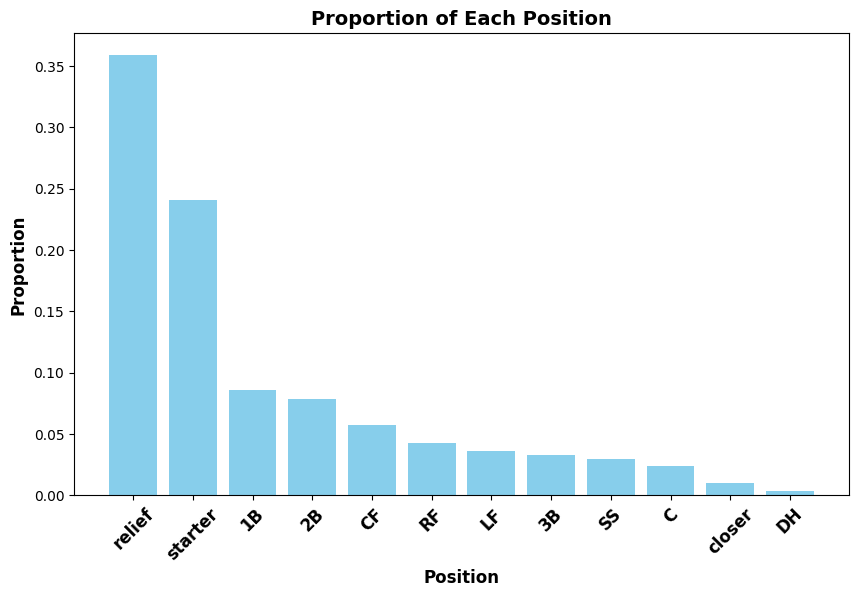

In [38]:
# Calculate the proportion of each 'pos'
proportion_df = df['pos'].value_counts(normalize=True).reset_index()

# Rename the columns for clarity
proportion_df.columns = ['pos', 'proportion']

# Sort the proportions from highest to lowest
proportion_df = proportion_df.sort_values(by='proportion', ascending=False)

# Create a barplot for the proportions
plt.figure(figsize=(10, 6))
plt.bar(proportion_df['pos'], proportion_df['proportion'], color='skyblue')
plt.title('Proportion of Each Position', fontsize=14, weight='bold')
plt.xlabel('Position', fontsize=12, weight='bold')
plt.ylabel('Proportion', fontsize=12, weight='bold')
plt.xticks(rotation=45)

plt.setp(plt.gca().get_xticklabels(), fontsize=12, fontweight='bold')

plt.savefig('pos_prop_barplot.png', dpi=300, bbox_inches='tight')

plt.show()

## Probability of Winning Rookie of the Year (by Position)

### Table of Probabilities

In [39]:
# Group by 'pos' and calculate the probability of rookie_of_the_year being 1
probabilities_roy = df.groupby('pos')['rookie_of_the_year'].mean().reset_index()

# Rename the column for clarity
probabilities_roy.rename(columns={'rookie_of_the_year': 'probability_of_roty'}, inplace=True)

probabilities_roy = probabilities_roy.sort_values(by='probability_of_roty', ascending=False)

# Display the resulting probabilities
print(probabilities_roy)

        pos  probability_of_roty
5        DH                 0.43
9    closer                 0.26
8        SS                 0.19
6        LF                 0.14
2        3B                 0.14
0        1B                 0.09
4        CF                 0.08
7        RF                 0.07
3         C                 0.07
1        2B                 0.05
11  starter                 0.03
10   relief                 0.01


In [40]:
df.groupby('pos')['rookie_of_the_year'].sum()

pos
1B        14.00
2B         7.00
3B         9.00
C          3.00
CF         9.00
DH         3.00
LF        10.00
RF         6.00
SS        11.00
closer     5.00
relief     5.00
starter   16.00
Name: rookie_of_the_year, dtype: float64

### Barplot of Probabilities

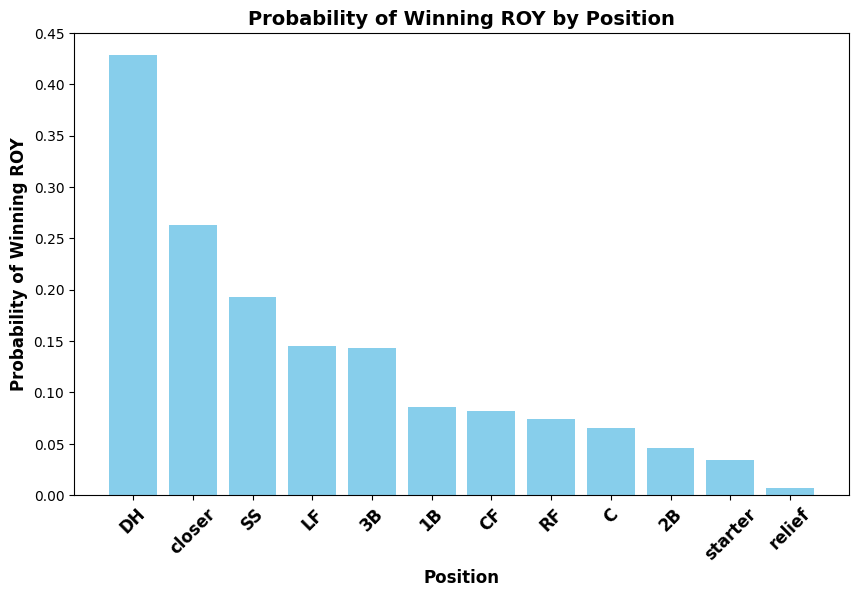

In [41]:
# Bar plot of sorted probabilities by position
plt.figure(figsize=(10, 6))
plt.bar(probabilities_roy['pos'], probabilities_roy['probability_of_roty'], color='skyblue')
plt.xlabel('Position', fontsize=12, weight='bold')
plt.ylabel('Probability of Winning ROY', fontsize=12, weight='bold')
plt.title('Probability of Winning ROY by Position', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.setp(plt.gca().get_xticklabels(), fontsize=12, fontweight='bold')

plt.savefig('pos_prop_roy.png', dpi=300, bbox_inches='tight')

plt.show()

## Probability of Receiving a Rookie of the Year Vote (by Position)

### Table of Probabilities

In [42]:
# Group by 'pos' and calculate the probability of rookie_of_the_year being 1
probabilities_vg = df.groupby('pos')['vote_getter'].mean().reset_index()

# Rename the column for clarity
probabilities_vg.rename(columns={'vote_getter': 'probability_of_vote'}, inplace=True)

probabilities_vg = probabilities_vg.sort_values(by='probability_of_vote', ascending=False)

# Display the resulting probabilities
print(probabilities_vg)

        pos  probability_of_vote
5        DH                 0.86
9    closer                 0.68
2        3B                 0.65
8        SS                 0.58
0        1B                 0.57
7        RF                 0.56
6        LF                 0.55
4        CF                 0.54
1        2B                 0.43
11  starter                 0.37
3         C                 0.37
10   relief                 0.09


### Barplot of Probabilities

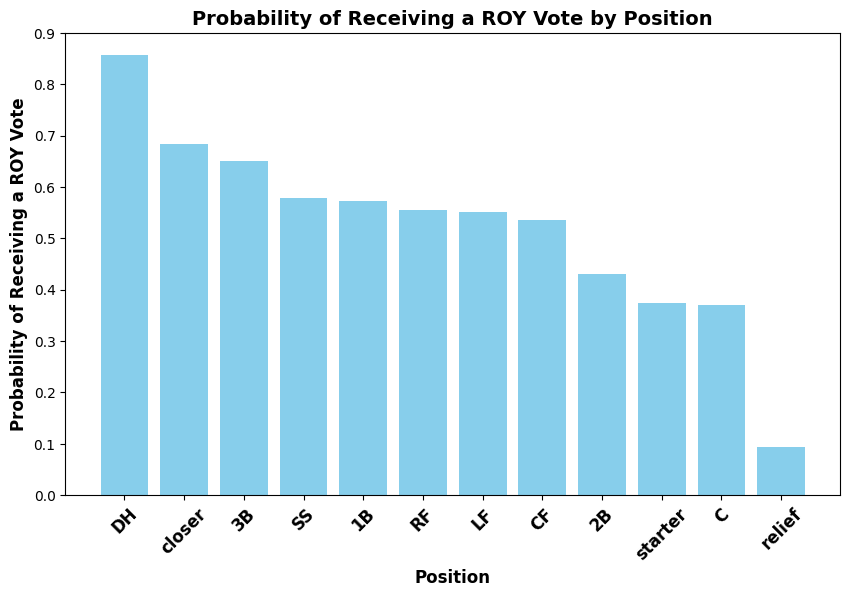

In [43]:
# Bar plot of sorted probabilities by position
plt.figure(figsize=(10, 6))
plt.bar(probabilities_vg['pos'], probabilities_vg['probability_of_vote'], color='skyblue')
plt.xlabel('Position', fontsize=12, weight='bold')
plt.ylabel('Probability of Receiving a ROY Vote', fontsize=12, weight='bold')
plt.title('Probability of Receiving a ROY Vote by Position', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.setp(plt.gca().get_xticklabels(), fontsize=12, fontweight='bold')

plt.savefig('pos_prop_vg.png', dpi=300, bbox_inches='tight')

plt.show()

In [44]:
batters_24 = pd.read_csv('../data/cleaned/bat_24_model_train.csv')
relievers_24 = pd.read_csv('../data/cleaned/relief_24_model_train.csv')
starters_24 = pd.read_csv('../data/cleaned/starter_24_model_train.csv')

stathead_war = pd.read_csv('../data/stathead/stathead_rookie_war.csv')
stathead_span = pd.read_csv('../data/stathead/stathead_rookie_span.csv')

In [45]:
# 1. Bind rows from starters and starters_24, then rename 'WAR' to 'fWAR'
starters_df = pd.concat([starters, starters_24]).rename(columns={'WAR': 'fWAR'}).sort_values(by='fWAR', ascending=False)

# 2. Create a new column 'WAR_per_IP', and rename columns in stathead_war
stathead_war['WAR_per_IP'] = stathead_war['WAR'] / stathead_war['IP']
stathead_war = stathead_war.rename(columns={
    'Player-additional': 'key_bbref',  # Rename 'Player-additional' to 'key_bbref'
    'WAR': 'bWAR'                      # Rename 'WAR' to 'bWAR'
})

# 3. Perform a left join of starters_df and selected columns from stathead_war
comb_start_df = pd.merge(starters_df, 
                         stathead_war[['Player', 'Season', 'bWAR', 'key_bbref']], 
                         how='left', 
                         on=['Season', 'key_bbref'])

# 4. Create the 'avg_WAR' column and sort by 'avg_WAR' in descending order
comb_start_df['avg_WAR'] = (comb_start_df['fWAR'] + comb_start_df['bWAR']) / 2
comb_start_df = comb_start_df.sort_values(by='avg_WAR', ascending=False)

In [46]:
# View the result
print(comb_start_df[['Name', 'Season', 'league', 'fWAR', 'bWAR', 'avg_WAR']].head(15))

                   Name  Season league  fWAR  bWAR  avg_WAR
6          Mark Fidrych    1976     AL  4.58  9.60     7.09
0         Dwight Gooden    1984     NL  8.26  5.50     6.88
1       John Montefusco    1975     NL  5.96  6.80     6.38
7           Britt Burns    1980     AL  4.50  7.00     5.75
10         Brandon Webb    2003     NL  4.31  6.10     5.20
14       José Fernández    2013     NL  4.16  6.20     5.18
17       Michael Soroka    2019     NL  4.01  6.10     5.06
2            Hideo Nomo    1995     NL  5.19  4.70     4.94
3   Fernando Valenzuela    1981     NL  4.88  4.80     4.84
9          Dave Fleming    1992     AL  4.37  5.10     4.73
20          Paul Skenes    2024     NL  3.85  5.50     4.68
22        Freddy Garcia    1999     AL  3.83  5.40     4.62
55          Dave Rozema    1977     AL  3.25  5.70     4.47
42         Kevin Appier    1990     AL  3.41  5.30     4.35
18           Roy Oswalt    2001     NL  3.97  4.70     4.33


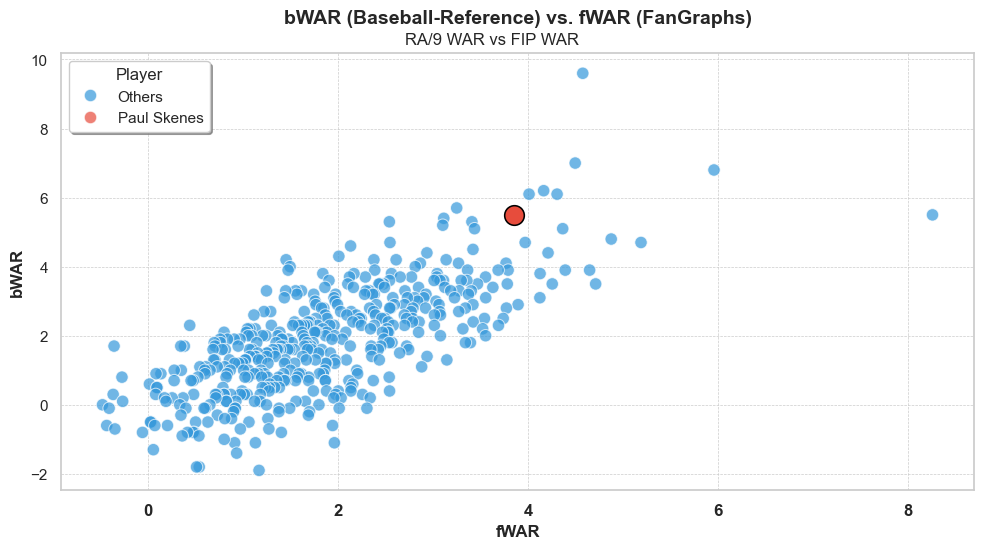

In [47]:
# Filter out rows with missing bWAR values
comb_start_df = comb_start_df.dropna(subset=['bWAR'])

# Create a new column to identify 'Paul Skenes'
comb_start_df['Player_Label'] = comb_start_df['Name'].apply(lambda x: 'Paul Skenes' if x == 'Paul Skenes' else 'Others')

# Set up the plot style
sns.set(style="whitegrid")

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot all points with different colors based on 'Player_Label'
sns.scatterplot(data=comb_start_df, x='fWAR', y='bWAR', hue='Player_Label', 
                palette={'Paul Skenes': '#E74C3C', 'Others': '#3498DB'}, s=80, alpha=0.7)

# Highlight 'Paul Skenes' with a larger point
sns.scatterplot(data=comb_start_df[comb_start_df['Name'] == 'Paul Skenes'], 
                x='fWAR', y='bWAR', color='#E74C3C', s=200, edgecolor='black')

# Add title and subtitle with refined layout
plt.title("bWAR (Baseball-Reference) vs. fWAR (FanGraphs)", fontsize=14, weight='bold', 
          y=1.05)
plt.suptitle("RA/9 WAR vs FIP WAR", fontsize=12, y=0.875)

# Customize axis labels with enhanced styling
plt.xlabel("fWAR", fontsize=12, weight='bold')
plt.ylabel("bWAR", fontsize=12, weight='bold')

# Customize legend
plt.legend(title='Player', title_fontsize=12, fontsize=11, loc='upper left', frameon=True, fancybox=True, shadow=True)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.setp(plt.gca().get_xticklabels(), fontsize=12, fontweight='bold')

plt.savefig('bWAR_vs_fWAR.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

In [48]:
cols = ['Name', 'Season', 'league', 'WAR']
batters_df = pd.concat([ batters[cols], batters_24[cols] ])

grouped_df = batters_df.groupby('Season')['WAR'].mean().reset_index().sort_values('WAR', ascending=False)
print(grouped_df.head(10))

    Season  WAR
13    1987 2.93
10    1984 2.87
18    1992 2.76
8     1982 2.25
0     1974 2.24
48    2024 2.23
27    2002 2.19
4     1978 2.11
14    1988 1.96
41    2016 1.95


In [49]:
starters_df = pd.concat([ starters[cols], starters_24[cols] ])

grouped_df = starters_df.groupby('Season')['WAR'].mean().reset_index().sort_values('WAR', ascending=False)
print(grouped_df.head(10))

    Season  WAR
10    1984 2.86
37    2012 2.85
7     1981 2.61
9     1983 2.57
1     1975 2.52
16    1990 2.43
15    1989 2.33
41    2016 2.31
19    1993 2.27
18    1992 2.23


In [50]:
relievers_df = pd.concat([ relievers[cols], relievers_24[cols] ])

grouped_df = relievers_df.groupby('Season')['WAR'].mean().reset_index().sort_values('WAR', ascending=False)
print(grouped_df.head(10))

    Season  WAR
6     1980 1.12
41    2016 1.06
15    1989 0.96
31    2006 0.95
12    1986 0.85
11    1985 0.82
5     1979 0.76
14    1988 0.71
13    1987 0.69
39    2014 0.68
